<a href="https://colab.research.google.com/github/mariajoseph83/Fruit_quality_detection_using_objectdetection_NN/blob/main/Codes/detectionfinalDense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
dataset_train_dir = '/content/drive/MyDrive/Datasets/train'
dataset_test_dir = '/content/drive/MyDrive/Datasets/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [ ]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Fruit/')))

3178
4130

1561
2031

1164
1534


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255/
)

SyntaxError: ignored

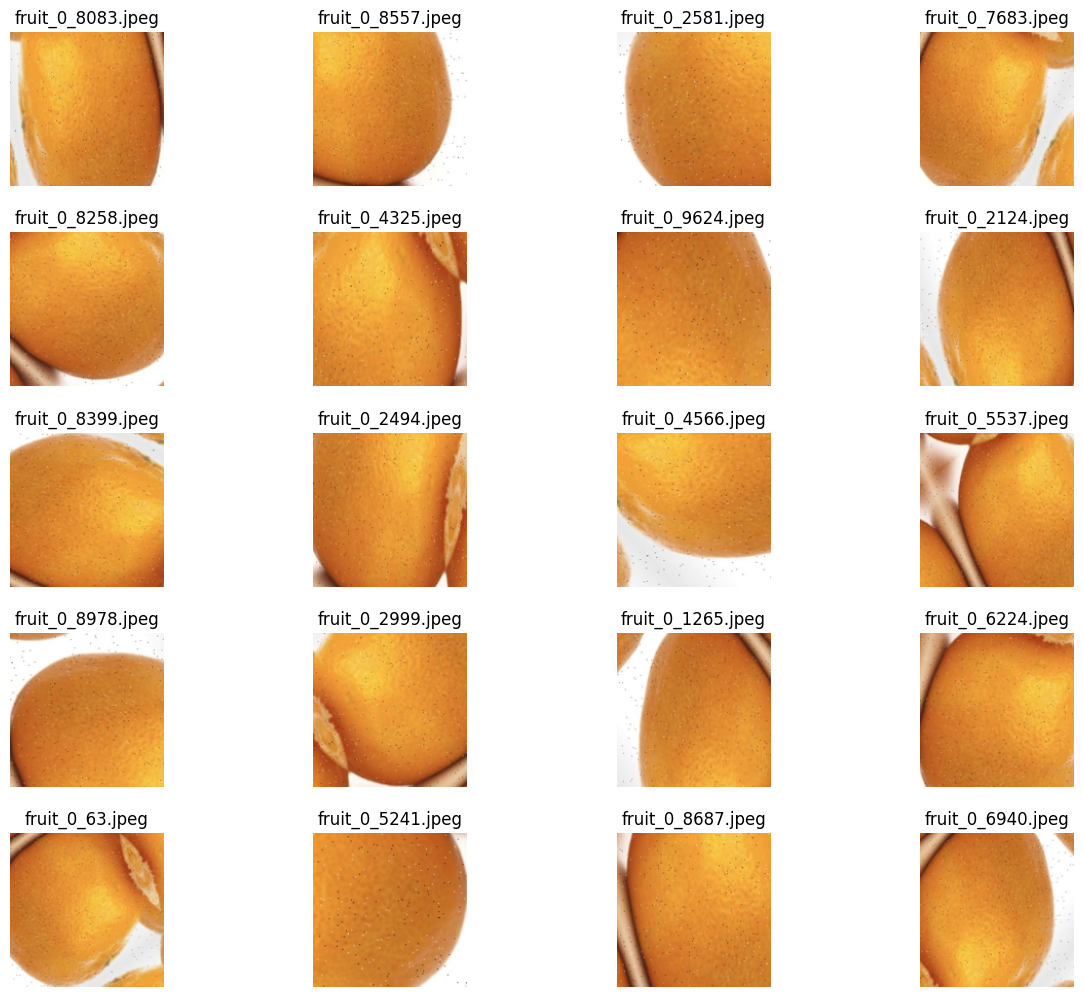

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])
img_augmentation = tf.keras.preprocessing.image.load_img(path_aug)
x_aug = img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot(int((len(preview_img)/4) + 1), 4, n+1)  # Convert to integer using int()
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(Image.open(os.path.join(preview_dir, preview_img[n])).resize((150, 150)))
    plt.title(preview_img[n])
    plt.axis('off')
for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150),
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 7308 images belonging to 2 classes.
Found 3592 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [ ]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3, MobileNetV2,ResNet50,EfficientNetB1,DenseNet121
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

####################### init pre_trained_model #################################

# pre_trained_model = InceptionV3(input_shape=(150,150,3),
#                                 include_top=False)

#pre_trained_model = VGG16(input_shape=(150,150,3),
 #                         include_top=False)
#pre_trained_model= MobileNetV2(input_shape=(150, 150, 3),
 #                                   include_top=False)
#pre_trained_model = DenseNet121(input_shape=(150, 150, 3),include_top=False)
pre_trained_model = ResNet50(include_top=False,
                             input_shape=(150, 150, 3))
# pre_trained_model = Xception(input_shape=(150,150,3),
#                              include_top=False)

# pre_trained_model.layers.pop()

####################### init pre_trained_model #################################

############################## freeze layer ####################################

for layer in pre_trained_model.layers:
    layer.trainable = False

# for layer in pre_trained_model.layers[:-4]:
#     layer.trainable = False

############################## freeze layer ####################################

############################## Flatten Layer ###################################

# last_output = pre_trained_model.layers[-1].output
# x = layers.Flatten()(last_output)

x = layers.Flatten()(pre_trained_model.output)

############################## Flatten Layer ###################################

######################### Fully Connected Layer ################################

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x789cb374e710>,input_6,False
1,<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x789cb84e86a0>,conv1_pad,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x789cb8439420>,conv1_conv,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x789cb84e92d0>,conv1_bn,False
4,<keras.layers.core.activation.Activation object at 0x789cb84e9f00>,conv1_relu,False
...,...,...,...
170,<keras.layers.core.activation.Activation object at 0x789cb3534730>,conv5_block3_2_relu,False
171,<keras.layers.convolutional.conv2d.Conv2D object at 0x789cb36d09a0>,conv5_block3_3_conv,False
172,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x789cb36d39d0>,conv5_block3_3_bn,False
173,<keras.layers.merging.add.Add object at 0x789cb36439a0>,conv5_block3_add,False


In [ ]:
train_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7308
3592


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/64),
    epochs=6,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/64)
)

Epoch 1/6
114/114 [==============================] - 688s 6s/step - loss: 0.6027 - accuracy: 0.6758 - val_loss: 0.5921 - val_accuracy: 0.6924
Epoch 2/6
114/114 [==============================] - 695s 6s/step - loss: 0.6071 - accuracy: 0.6614 - val_loss: 0.6093 - val_accuracy: 0.6552
Epoch 3/6
114/114 [==============================] - 669s 6s/step - loss: 0.6028 - accuracy: 0.6647 - val_loss: 0.5837 - val_accuracy: 0.7034
Epoch 4/6
114/114 [==============================] - 682s 6s/step - loss: 0.5897 - accuracy: 0.6779 - val_loss: 0.5902 - val_accuracy: 0.6716
Epoch 5/6
114/114 [==============================] - 691s 6s/step - loss: 0.6175 - accuracy: 0.6475 - val_loss: 0.5743 - val_accuracy: 0.6968
Epoch 6/6
114/114 [==============================] - 687s 6s/step - loss: 0.5997 - accuracy: 0.6799 - val_loss: 0.5825 - val_accuracy: 0.7034


<Figure size 640x480 with 0 Axes>

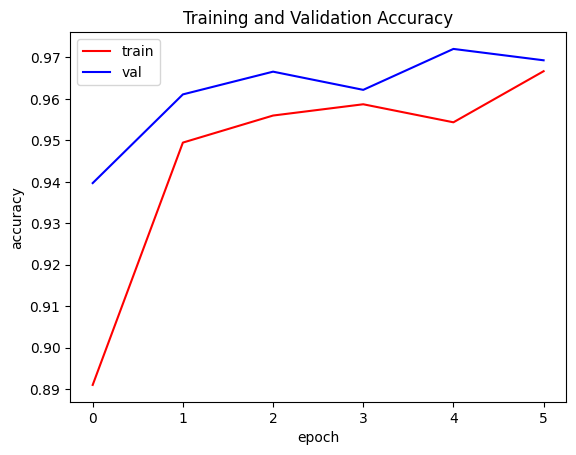

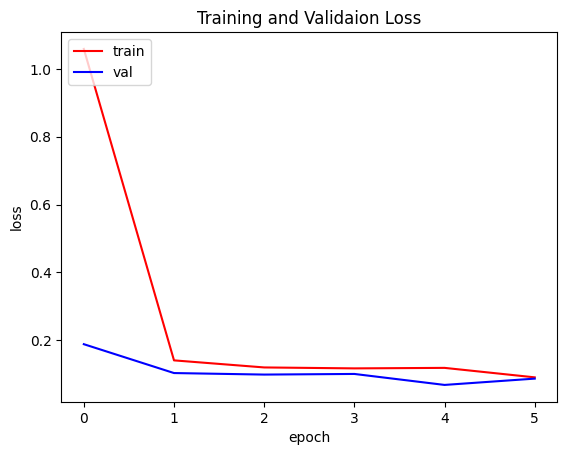

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 2 classes.
2698/2698 [==============================] - 307s 114ms/step - loss: 0.0471 - accuracy: 0.9833
accuracy test:  0.983320951461792
loss test:  0.04709435626864433


In [ ]:
model.save('detectionfmodelDense.h5')

In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import get_file
import pathlib
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow as tf
import math

model_predict = tf.keras.models.load_model('/content/drive/MyDrive/detectionfmodelDense.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(15, 15))
num_rows = math.ceil(len(image_name) / 4)  # Calculate the number of rows with math.ceil
for n in range(len(image_name)):
    plt.subplot(num_rows, 4, n + 1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
    title = f"predict: {predict_result[n]} ({round(float(image_conf[n]) * 100, 2)}%)"
    if predict_result[n] == 'Fresh Fruit':
        plt.title(title, color='black')
    else:
        plt.title(title, color='red')

    plt.axis('off')
plt.show()

for fn in image_name:
    os.system(f'rm {fn}')

1/1 [==============================] - 0s 166ms/step


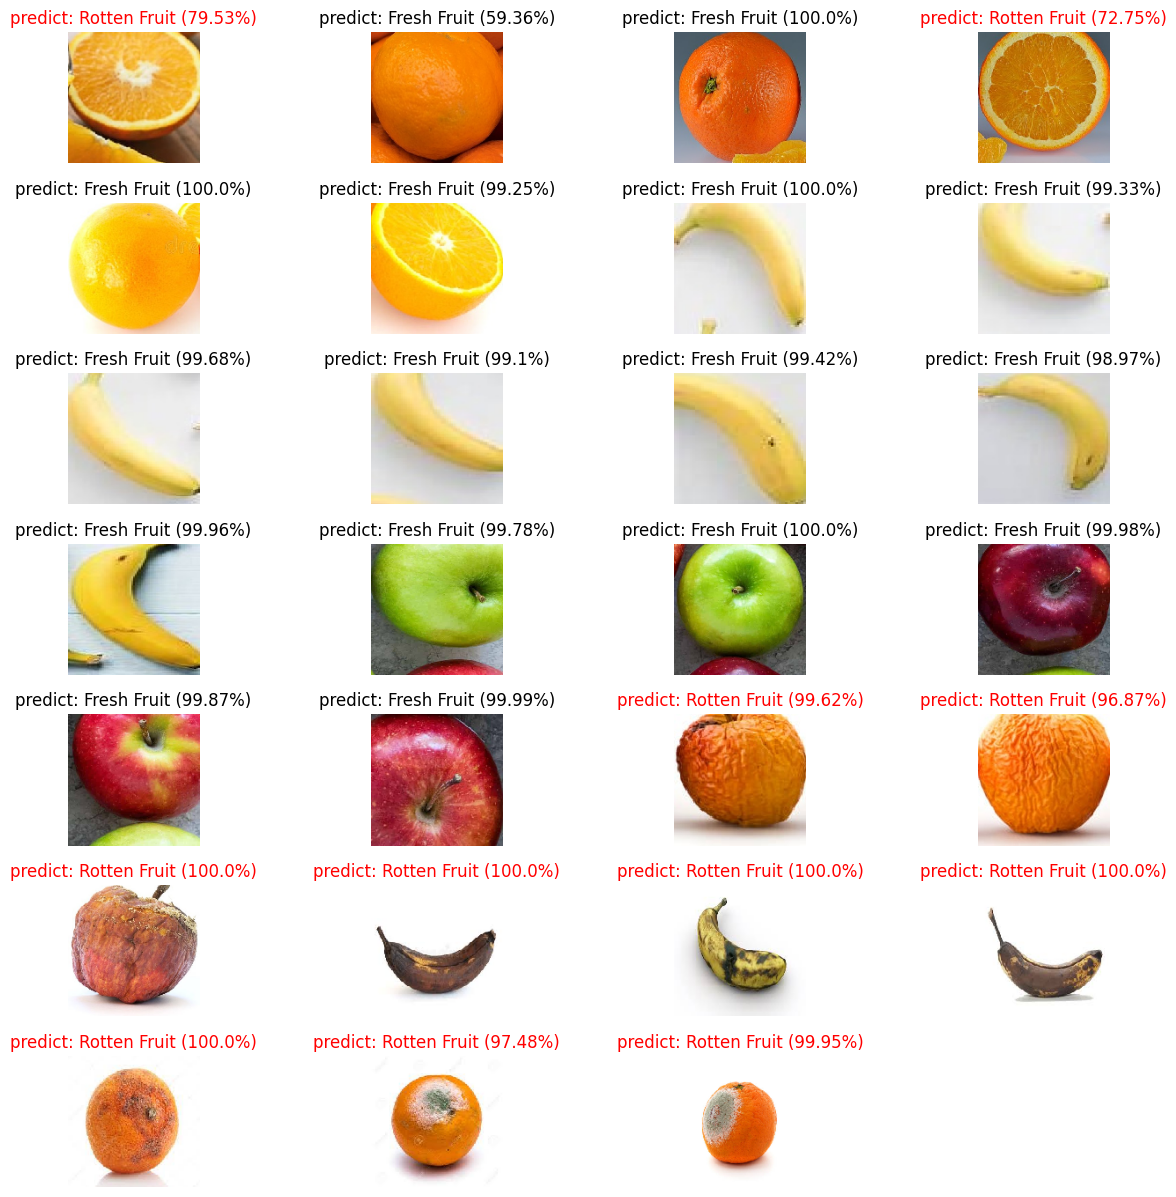

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import get_file
import pathlib
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import tensorflow as tf
import math


# Specify the folder where the images are located
images_folder = '/content/drive/MyDrive/cropped'

# Get a list of all image file names in the folder
image_files = [os.path.join(images_folder, fn) for fn in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, fn))]

# Initialize lists to store the results
image_name = []
image_conf = []
predict_result = []

for fn in image_files:
    img = image.load_img(fn, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255

    images = np.vstack([img])
    classes = model_predict.predict(images, batch_size=10)
    label = np.where(classes[0] > 0.5, 1, 0)

    if label == 0:
        image_name.append(fn)
        image_conf.append(1.0 - classes[0])
        predict_result.append('Fresh Fruit')
    else:
        image_name.append(fn)
        image_conf.append(classes[0])
        predict_result.append('Rotten Fruit')

# Display the results
plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
    plt.subplot(math.ceil(len(image_name)/4), 4, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
    title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
    if predict_result[n] == 'Fresh Fruit':
        plt.title(title, color='black')
    else:
        plt.title(title, color='red')

    plt.axis('off')
plt.show()

